In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
data_name = 'summary.txt'

col_names = ['Step','t','M','LogL','LogR',
             'LogTs','LogTc','Logrhoc','logPc','psic',
             'Xc','Yc','XCc','XNc','XOc',
             'taudyn','tauKH','taunuc','Lpp','LCNO',
             'L3a','LZ','Lv','MHe','MC',
             'MO','RHe','RC','RO']

col_names_structure = ['Mr','r','Lr','P','rho',
                       'T','U','S','Cp','adia1',
                       'nablaad','mu','ne','Pe','Pr',
                       'nablarad','nabla','vc','kappa','epsnuc',
                       'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                       'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']

masses = np.array([0.1, 0.5, 1, 1.5, 2,
                   3, 5, 8, 10, 15,
                   20, 30, 50, 100])

metallicities = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03])

In [2]:
# Function that adds both P_ion to existing structure file df 

def P_ion(df):
    # Constants
    k = 1.380649e-23 # Boltzmann [J/K]
    m_u = 1.6605e-27 # Atomic mass unit [kg]

    P_ion1 = df['rho']*k*df['T'] / (df['mu']*m_u) # Eq 5
    P_ion2 = df['P'] - df['Pe'] - df['Pr']

    df['Pion1'] = P_ion1
    df['Pion2'] = P_ion2
    
    return df

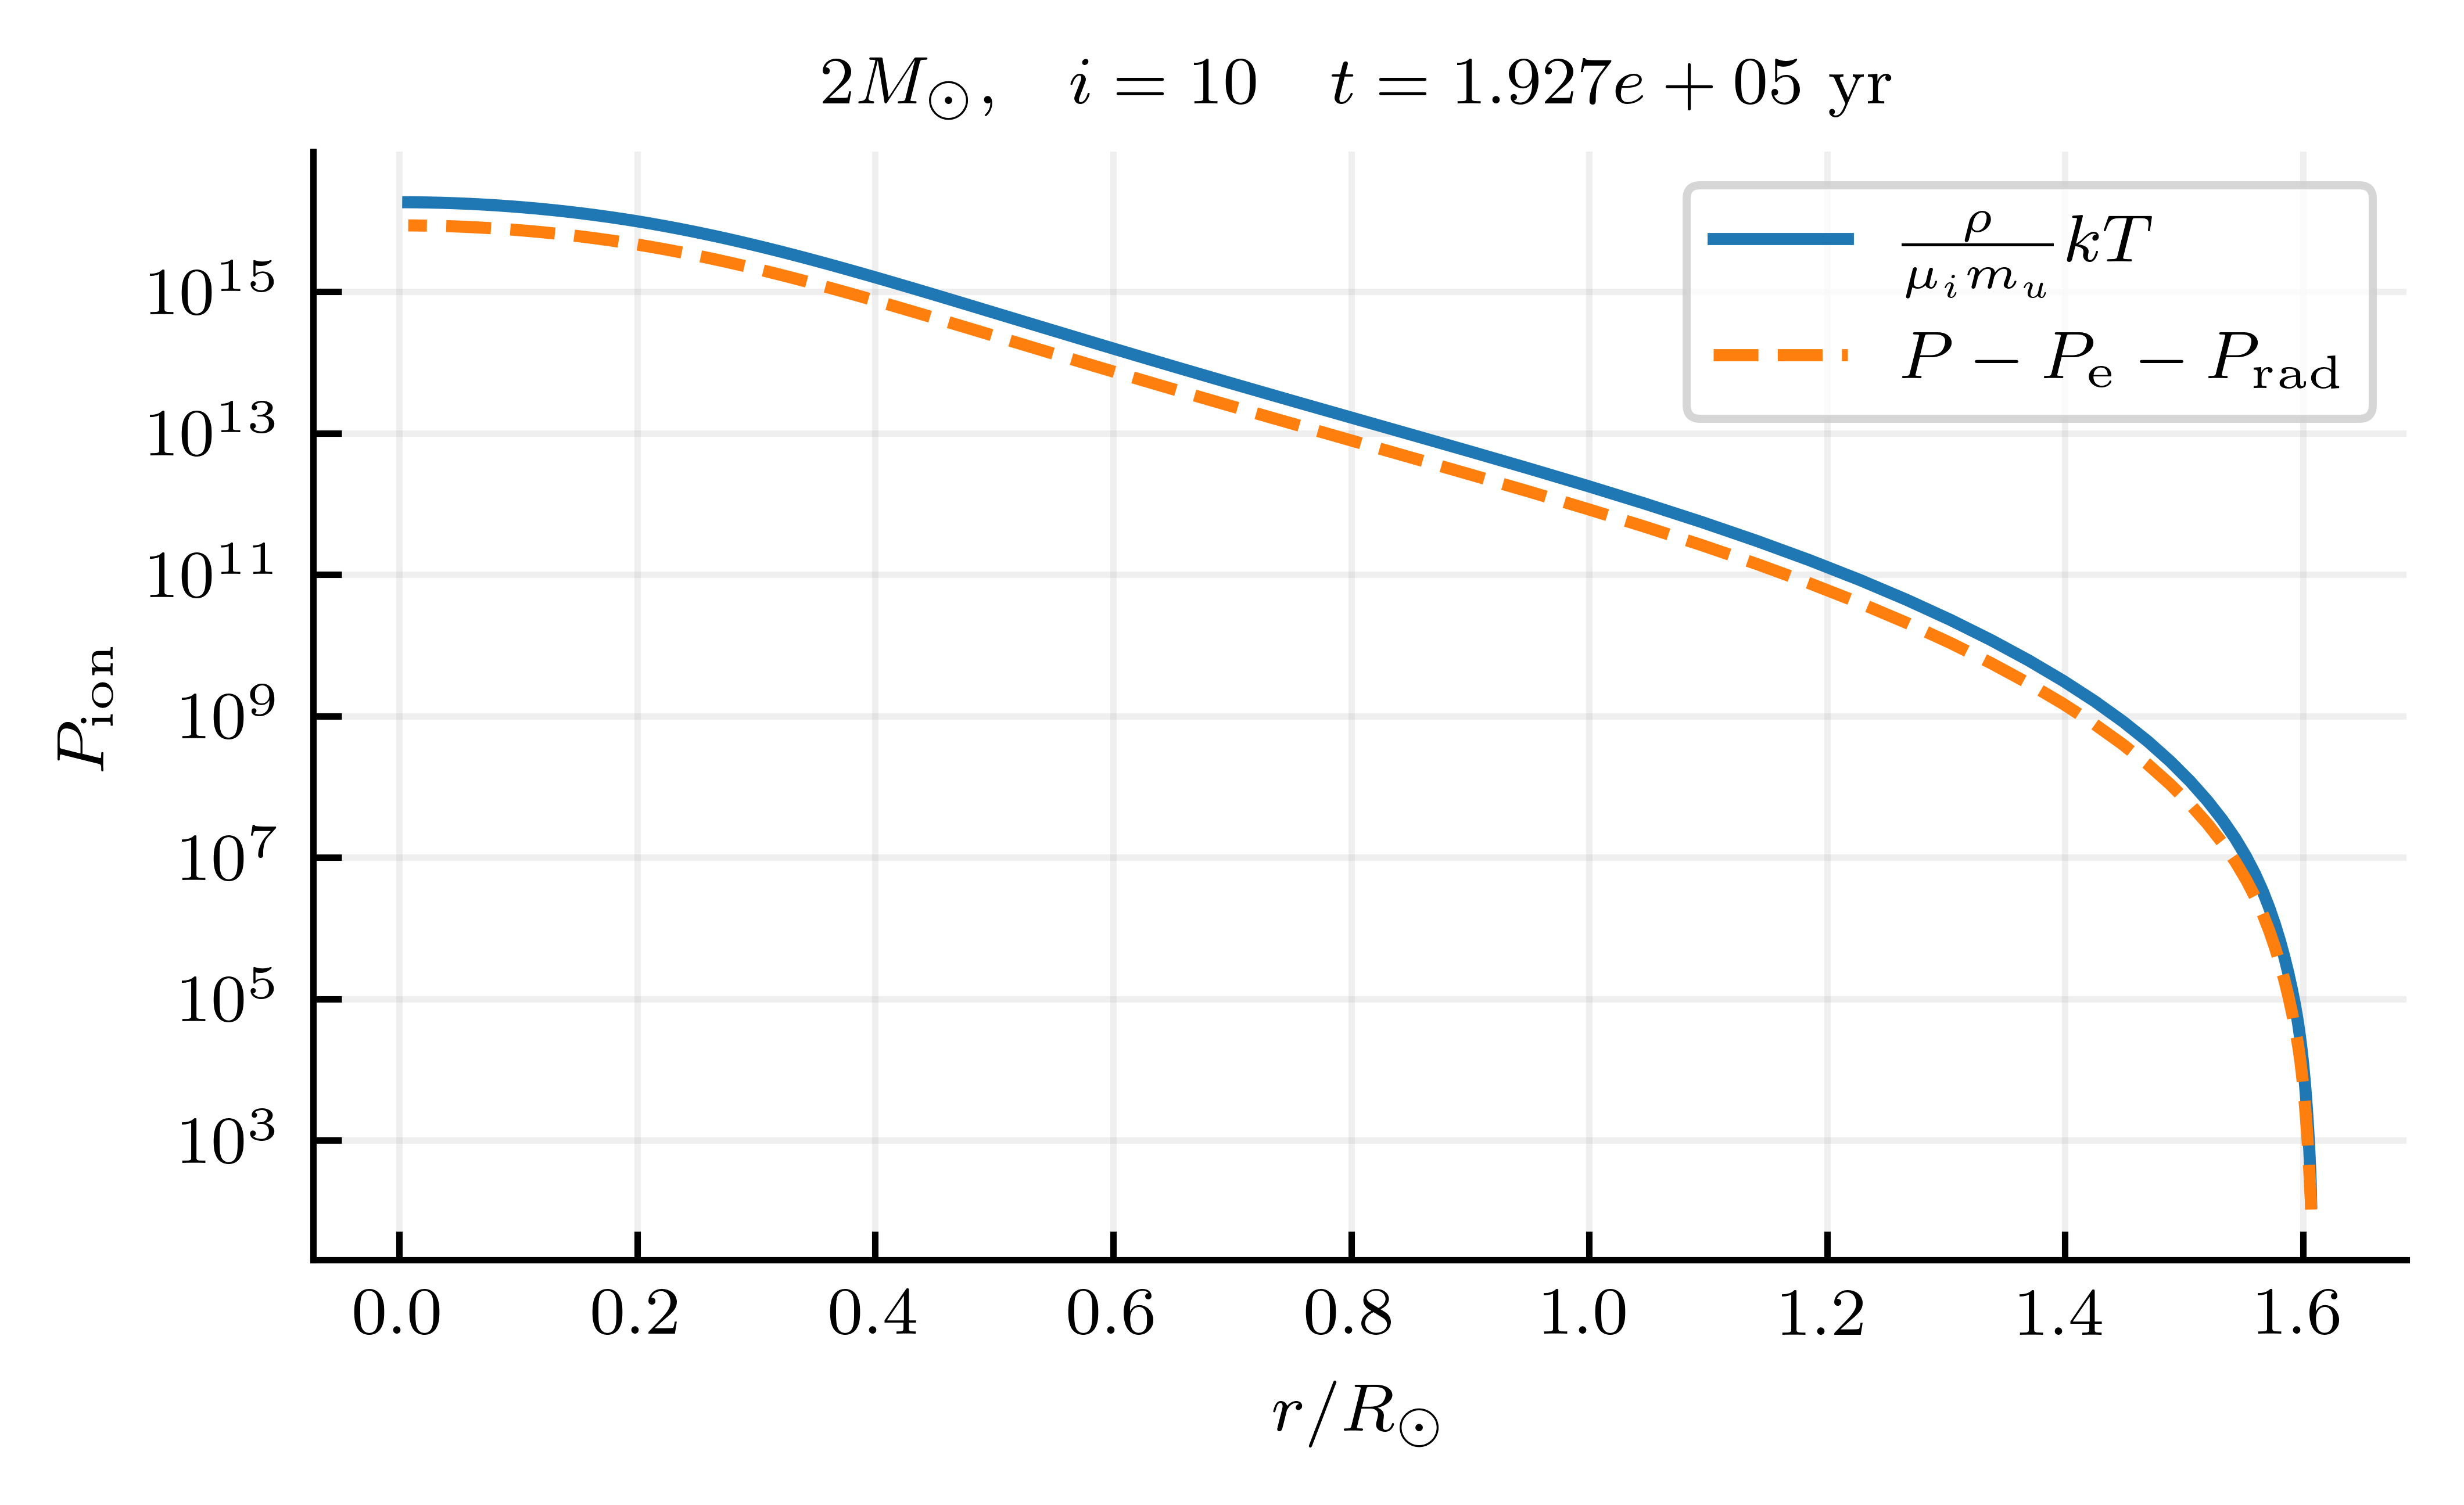

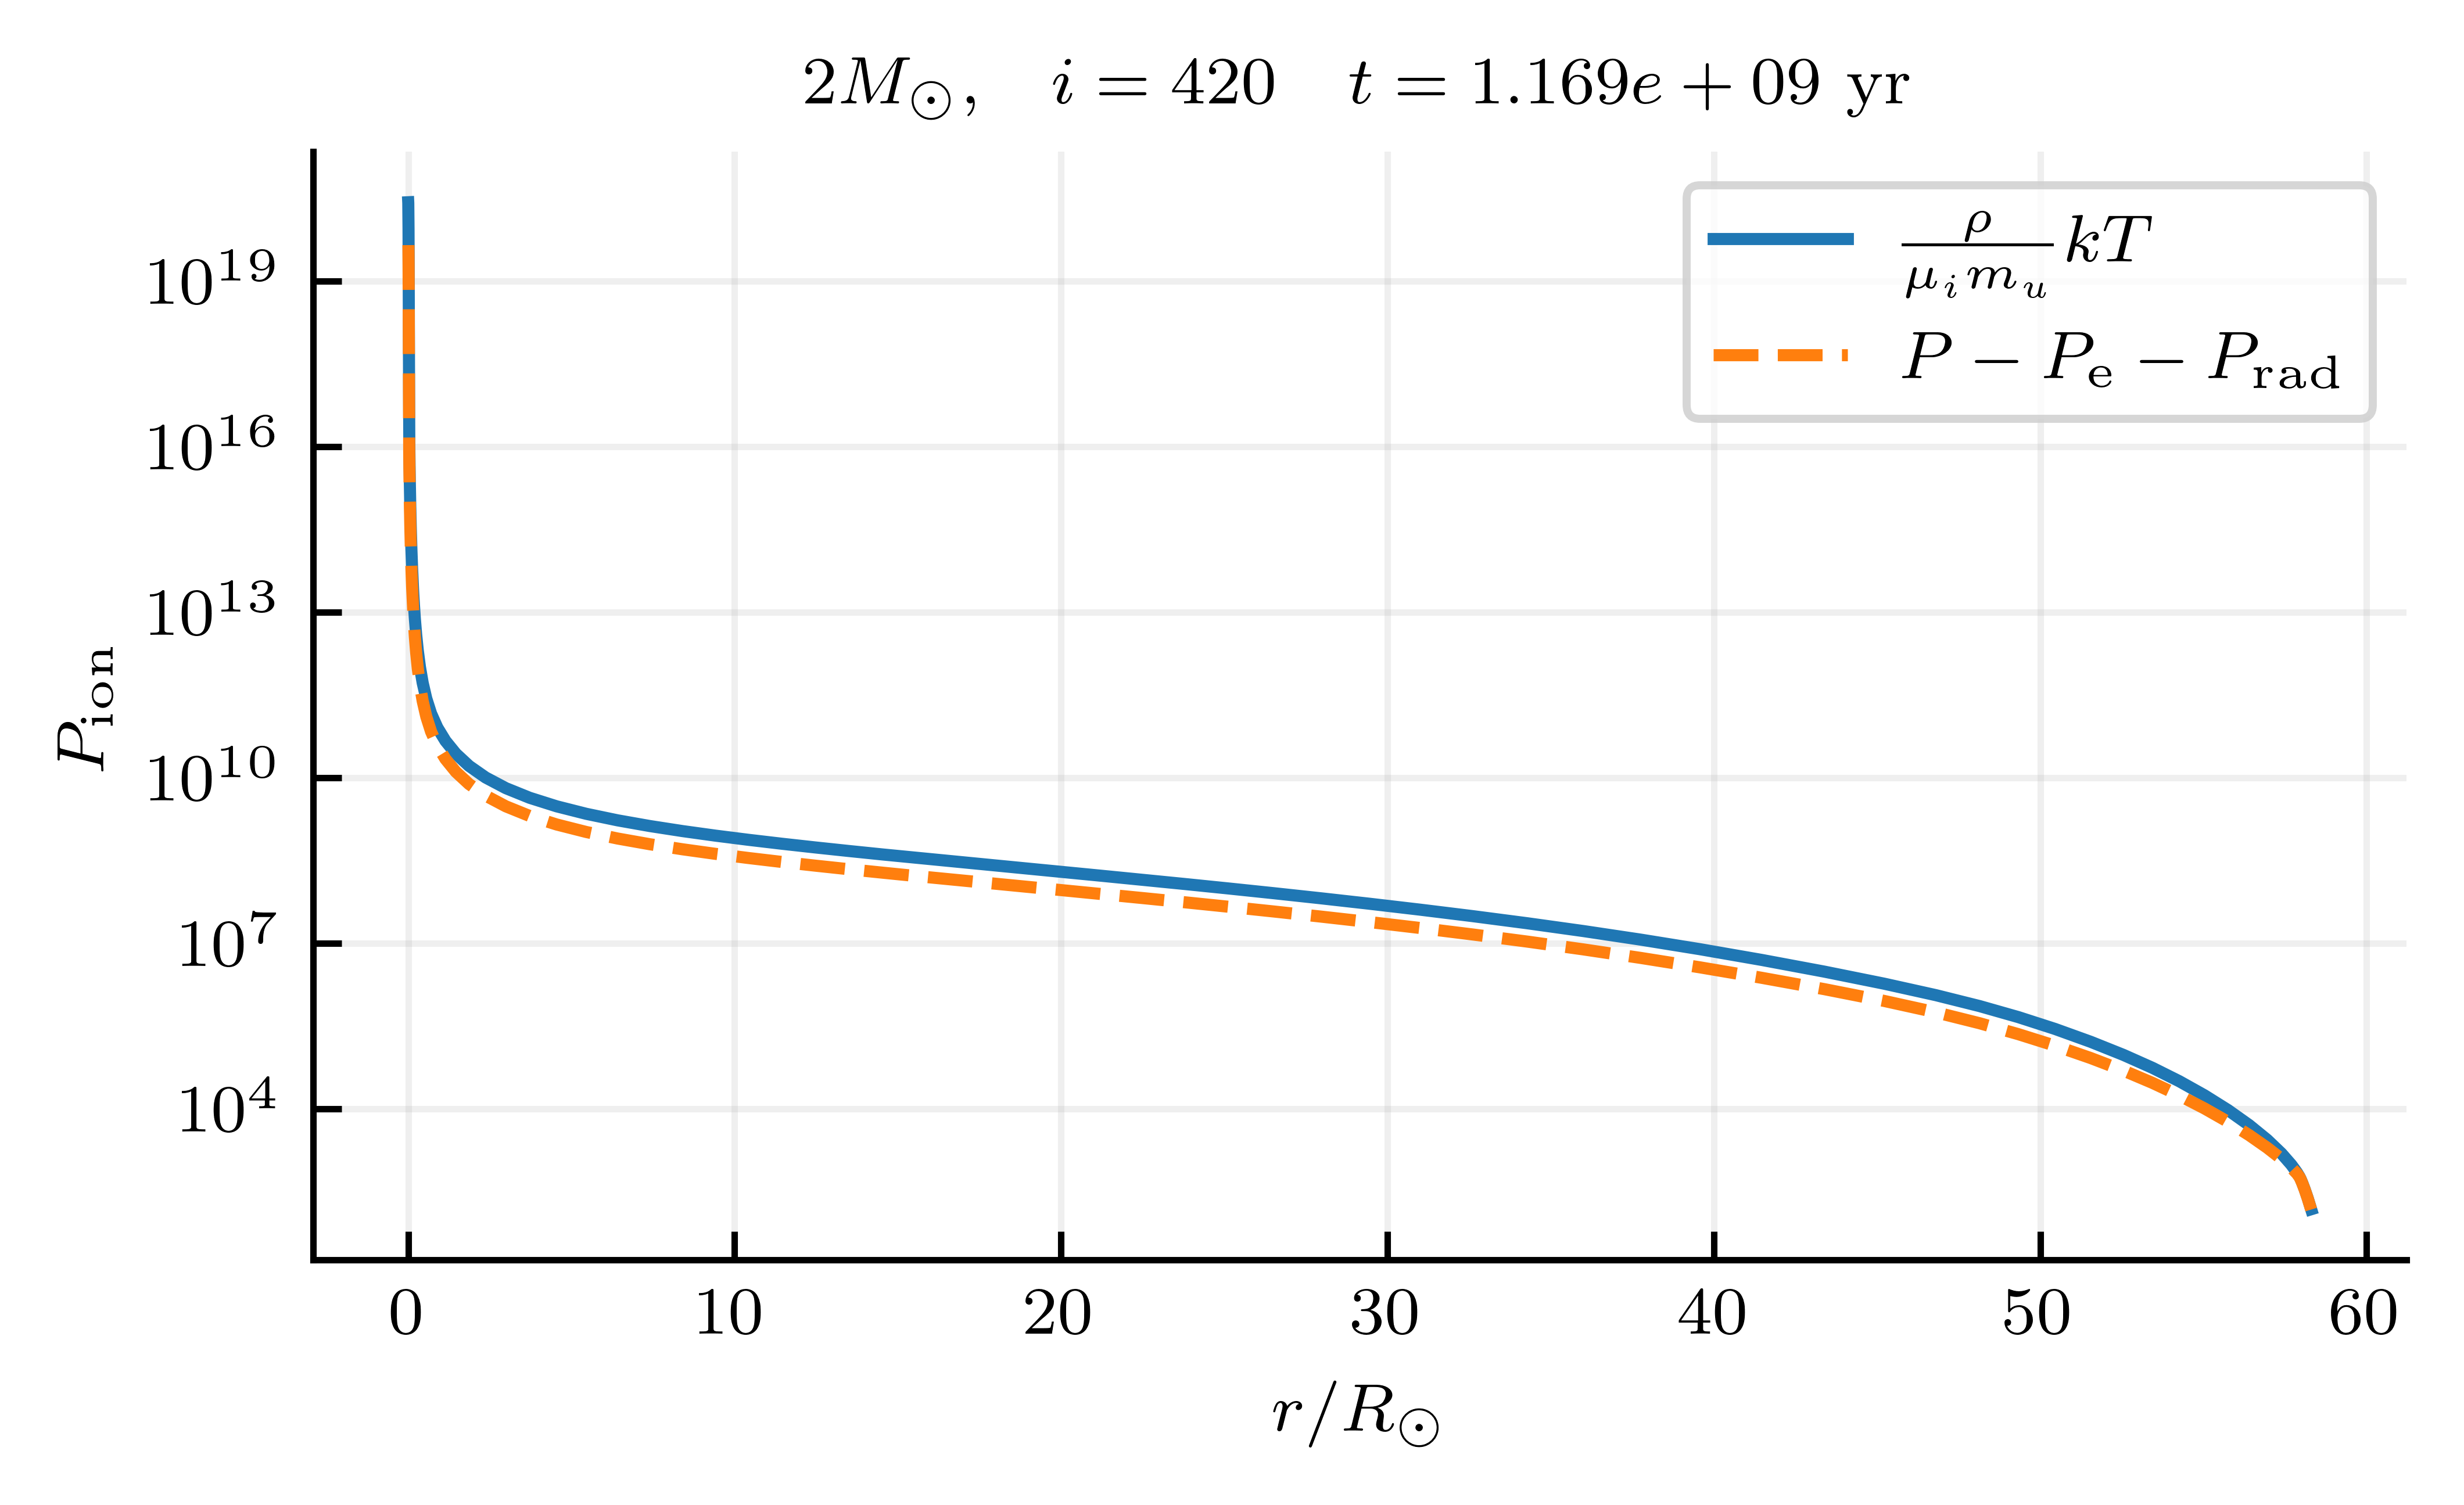

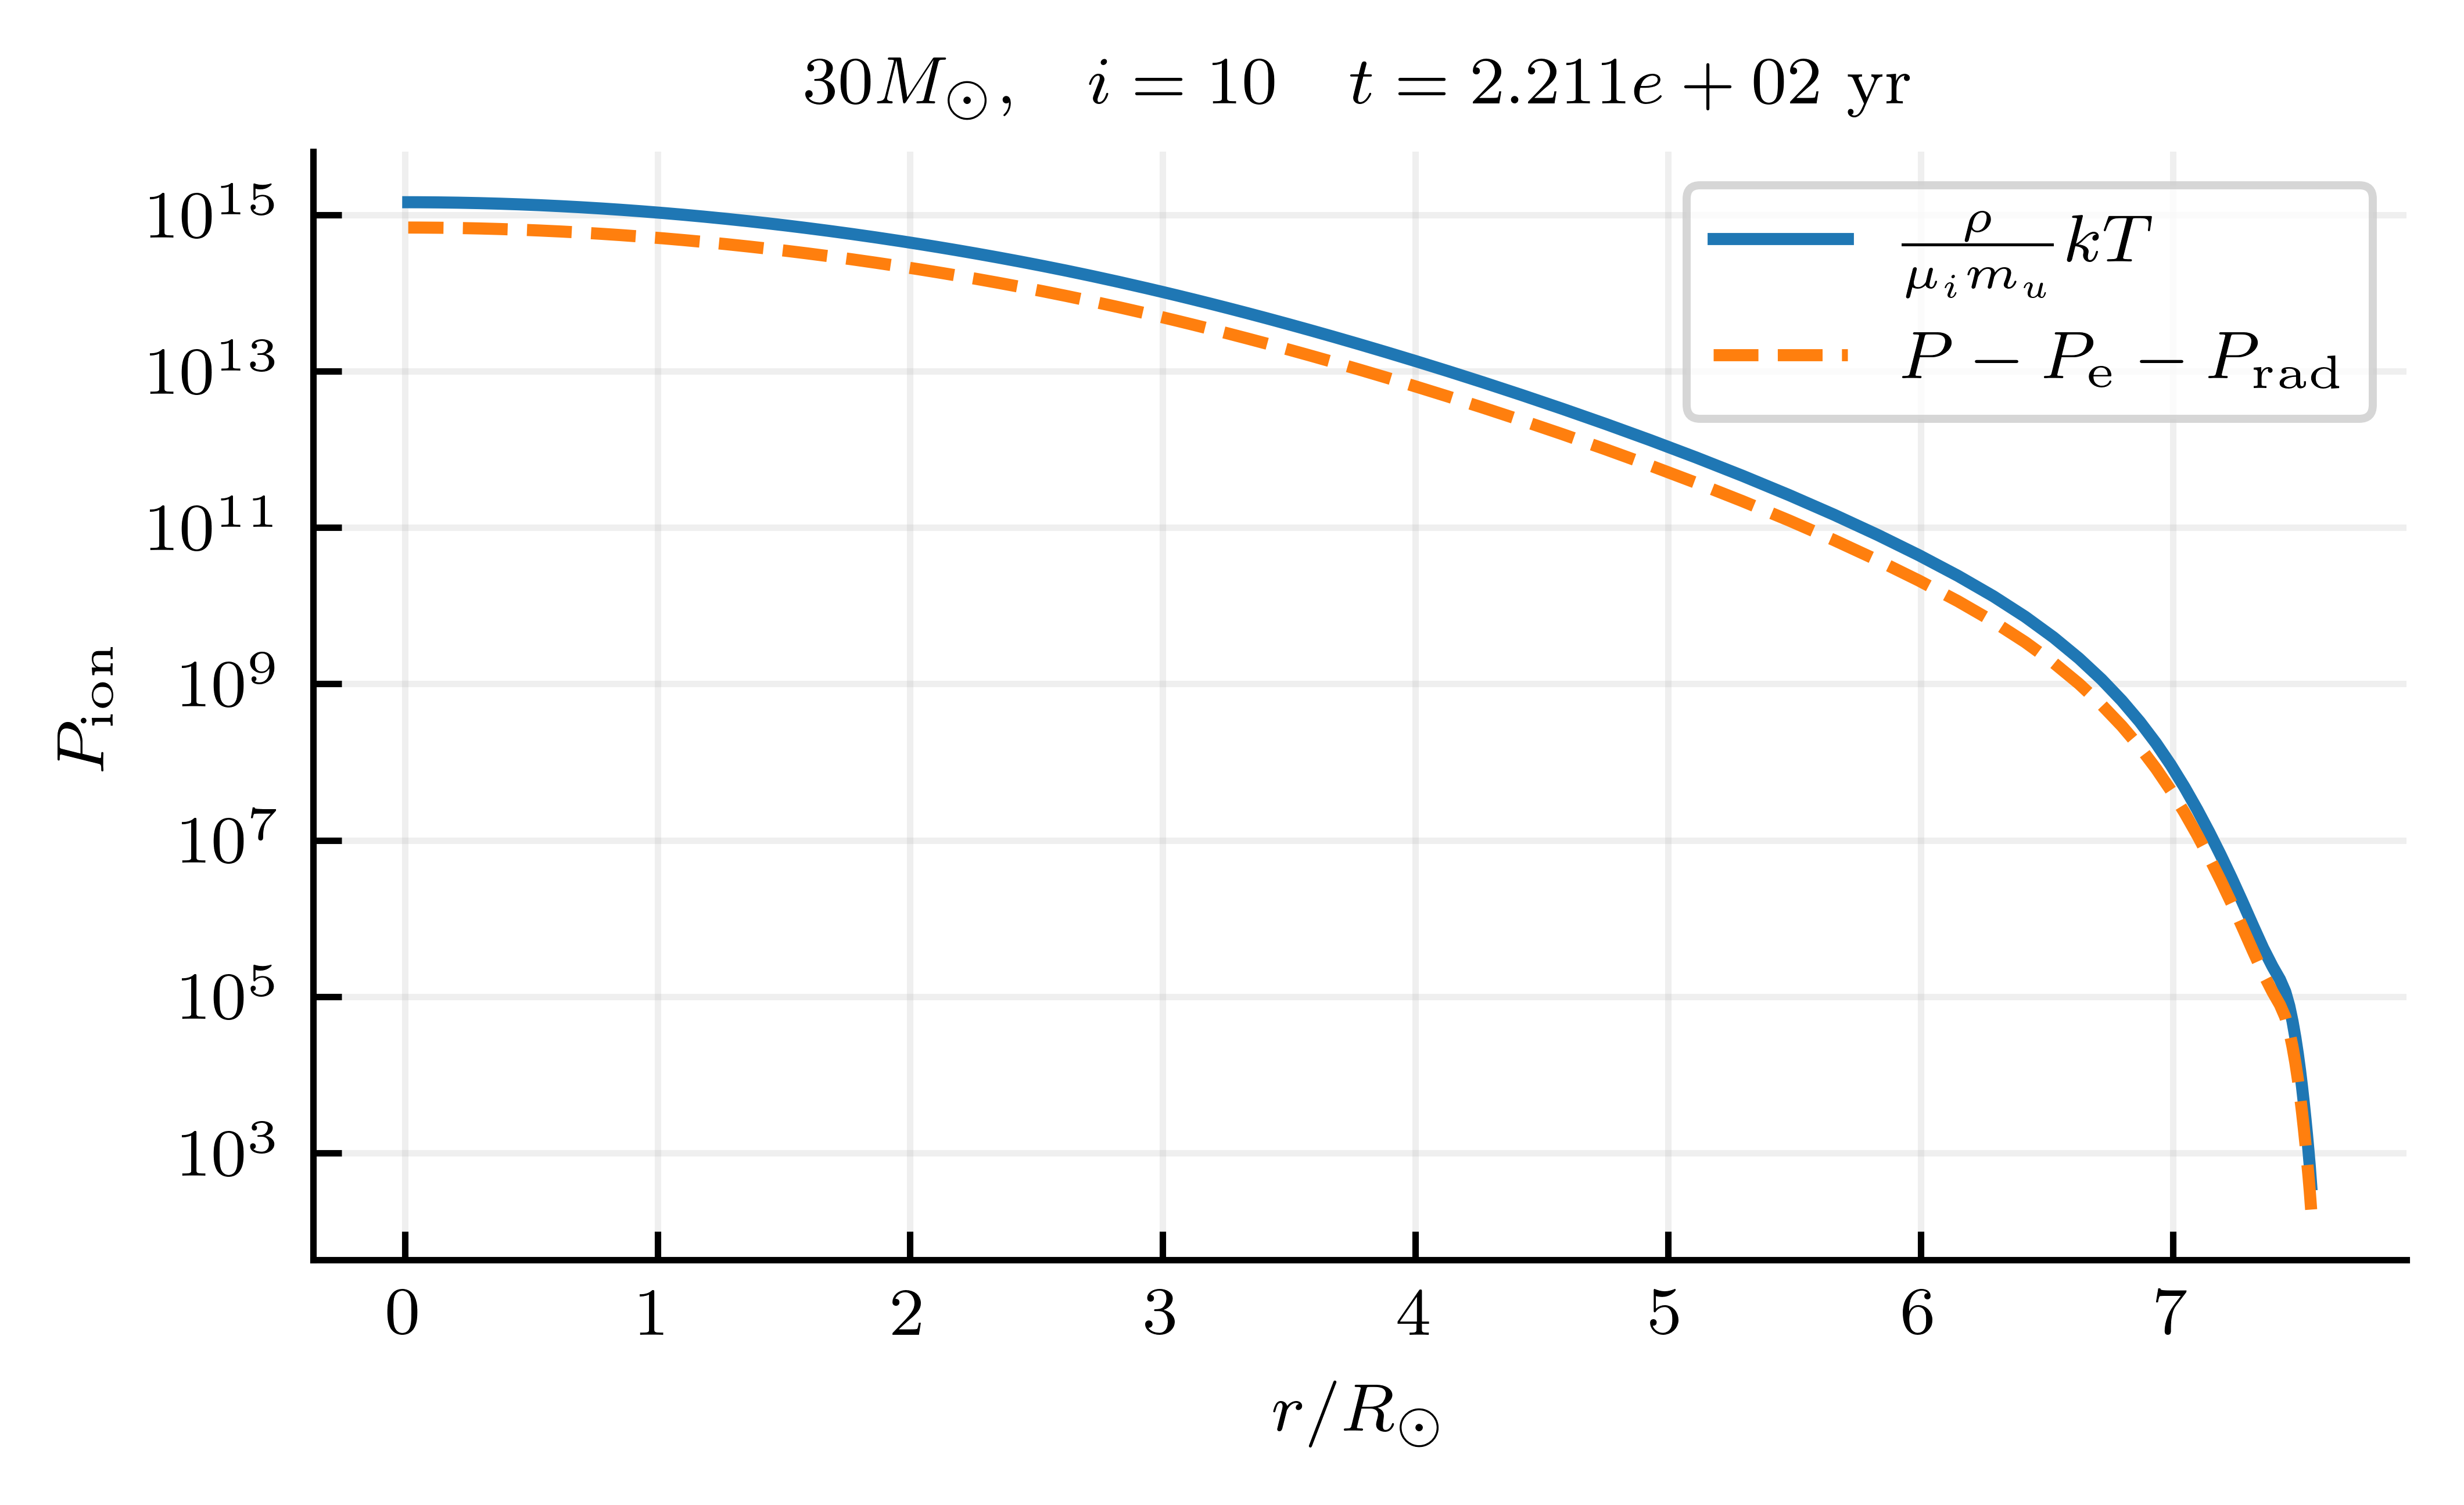

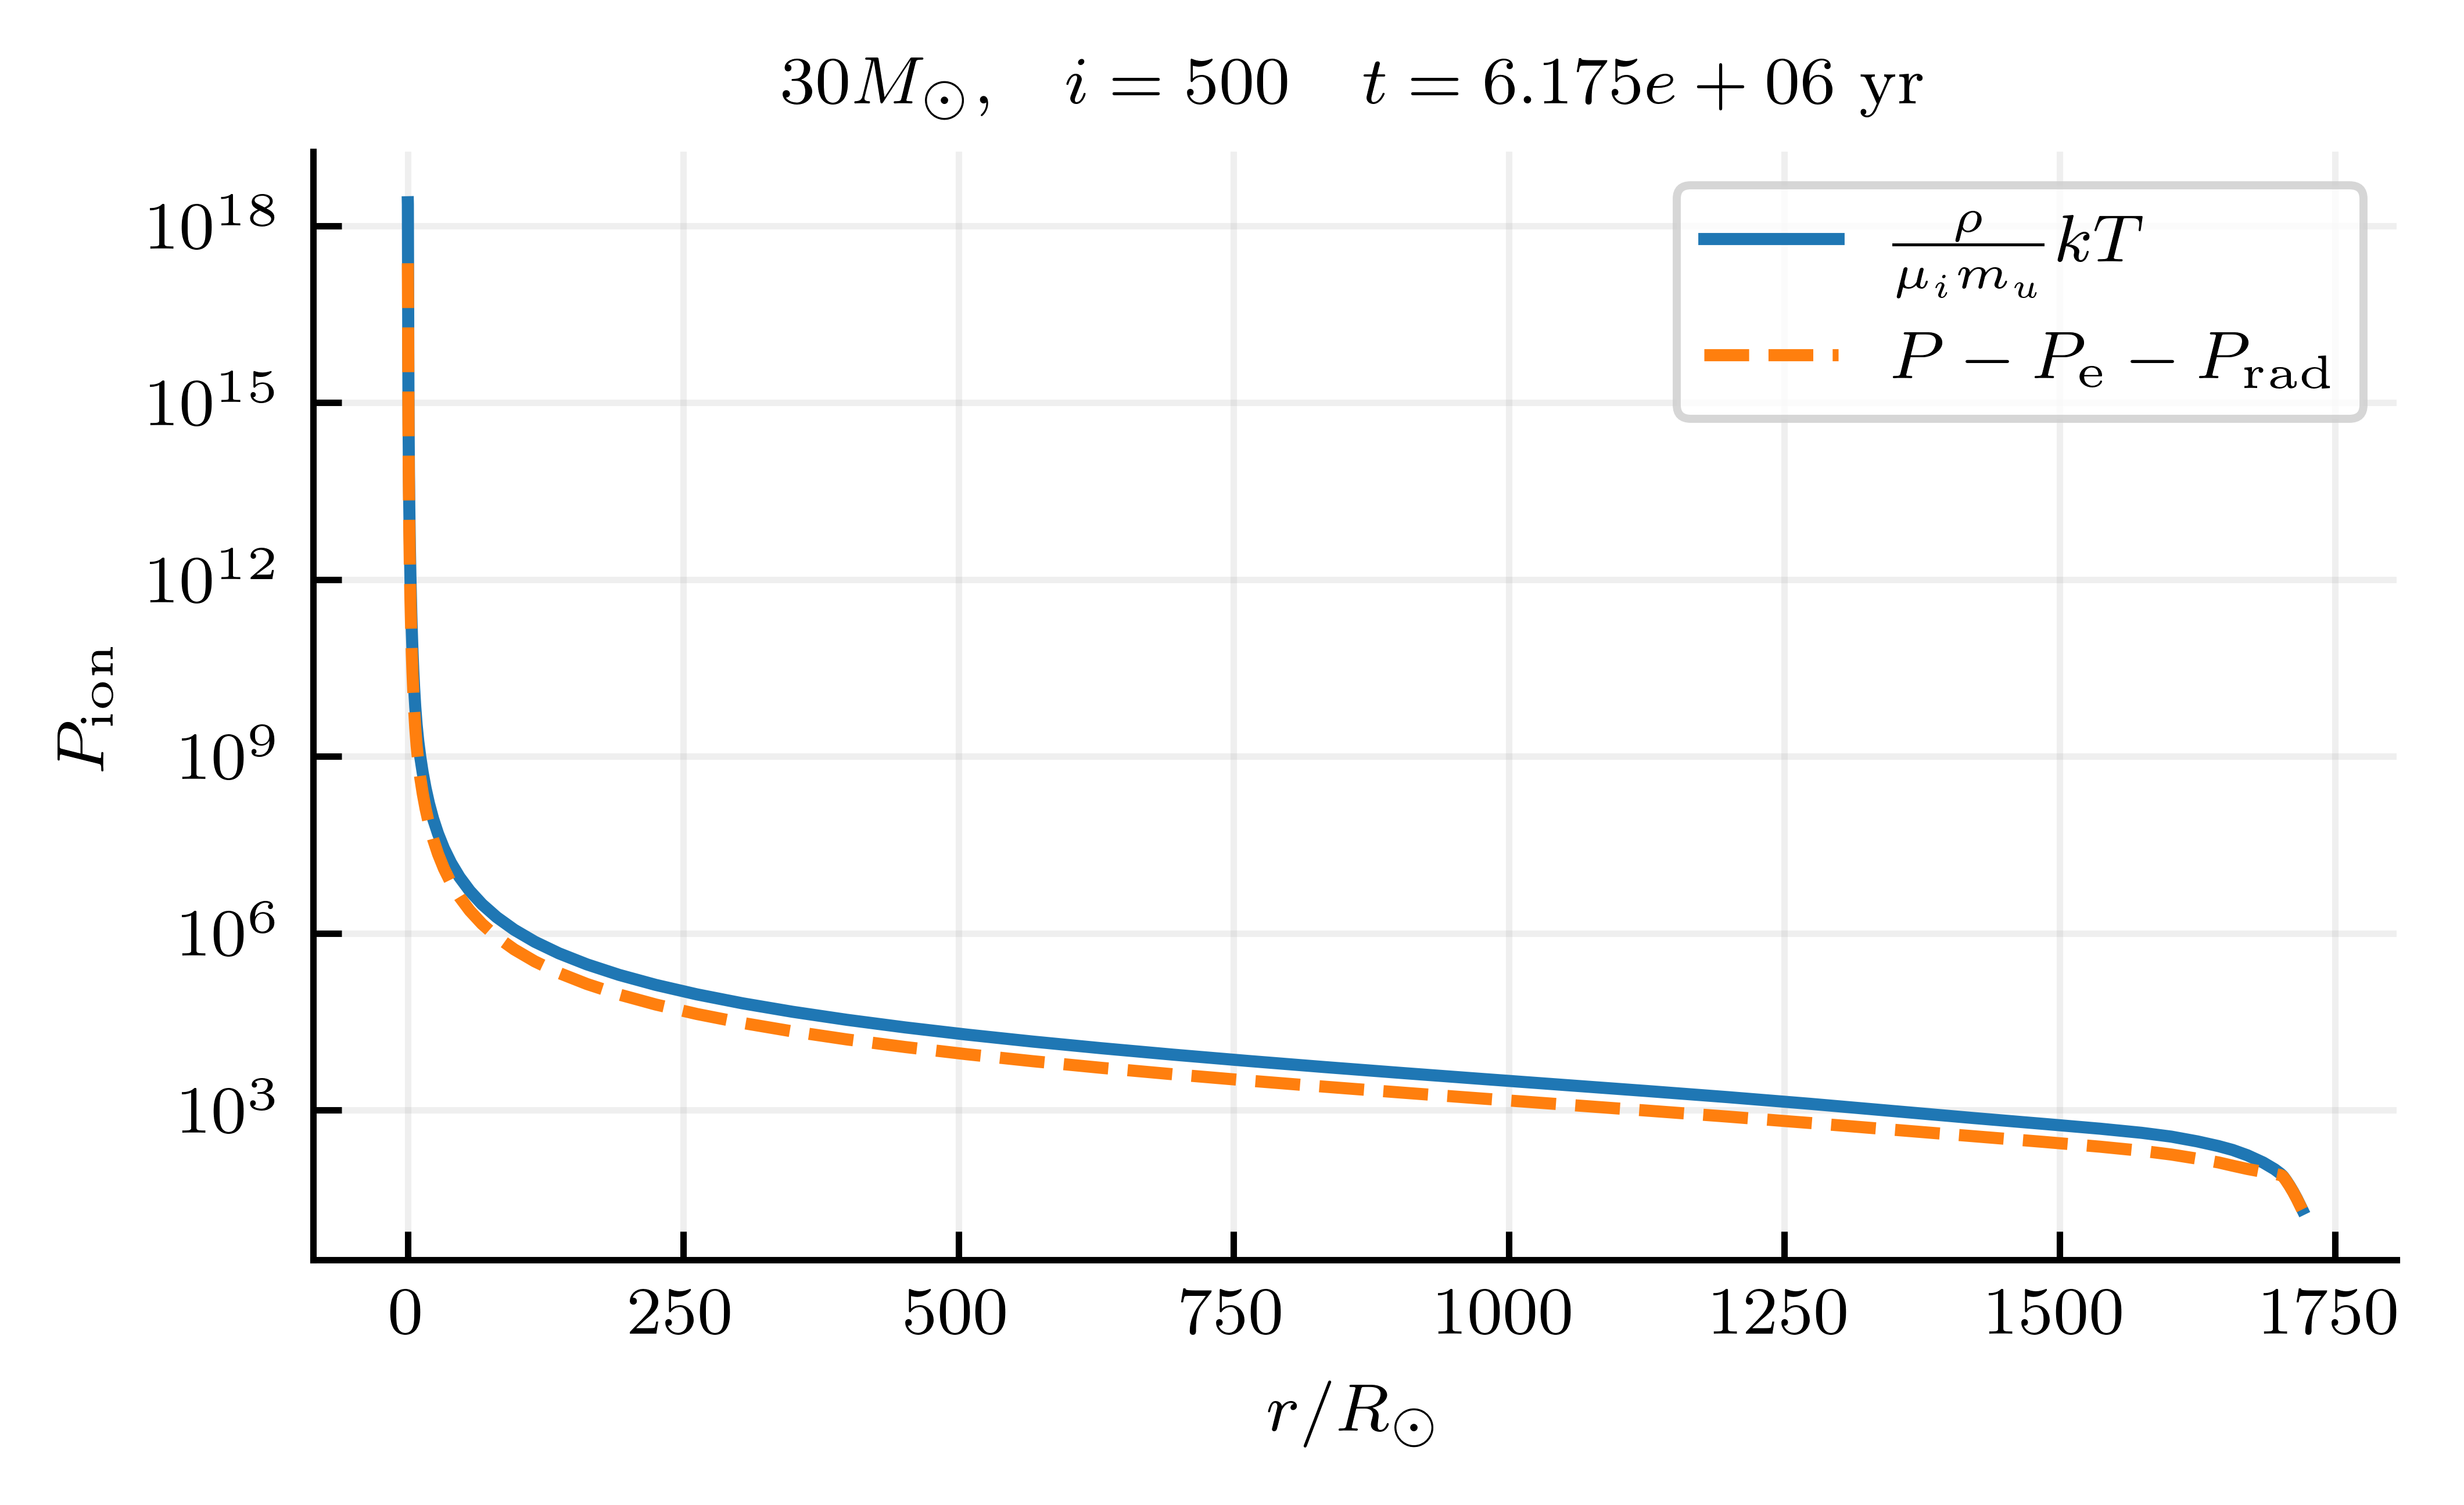

In [28]:
# To-do:
#   - Find "important" times t to investigate (and convert to Step)
#   - Helium, carbon and oxygen core radii could be included

def plot_Pion(mass,metal,step=1):

    fig,ax = plt.subplots() # One plot per mass
        
    cmap = cm.copper
    norm = mcolors.Normalize(vmin=0,vmax=1)

    # Import data and calculate both P_ion
    df = pd.read_csv(DATA_DIR+f'/{mass:.3g}M_{metal:.3g}'+f'/structure_{step:05d}.txt',
                        delim_whitespace=True, header=None)
    df.columns = col_names_structure
    df = P_ion(df)
    
    # Import summary.txt for timestamp
    df_summary = pd.read_csv(DATA_DIR+f'/{mass:.3g}M_{metal:.3g}/summary.txt',
                        delim_whitespace=True, header=None)
    df_summary.columns = col_names
    t = df_summary['t'][step]

    # Plotting
    ax.semilogy(df['r'],df['Pion1'],label=r'$\frac{\rho}{\mu_i m_u}kT$',
                linestyle='-')
    ax.semilogy(df['r'],df['Pion2'],label=r'$P-P_{\mathrm{e}}-P_{\mathrm{rad}}$',
                linestyle='--')
    ax.set_title(f'{mass:.3g}'+r'$M_\odot$,'+rf'$\quad i={step}$'+rf'$\quad t={t:.3e}$ yr')

    ax.legend()
    ax.grid(which='both', alpha=0.2, visible=True)
    ax.set_xlabel(r'$r/R_\odot$')
    ax.set_ylabel(r'$P_\mathrm{ion}$')

metal = 0.02
step = 420 # Which structure file to analyze

plot_Pion(2,0.02,10)
plot_Pion(2,0.02,420) # 420 is past MS
plot_Pion(30,0.02,10)
plot_Pion(30,0.02,500) # 500 is past MS

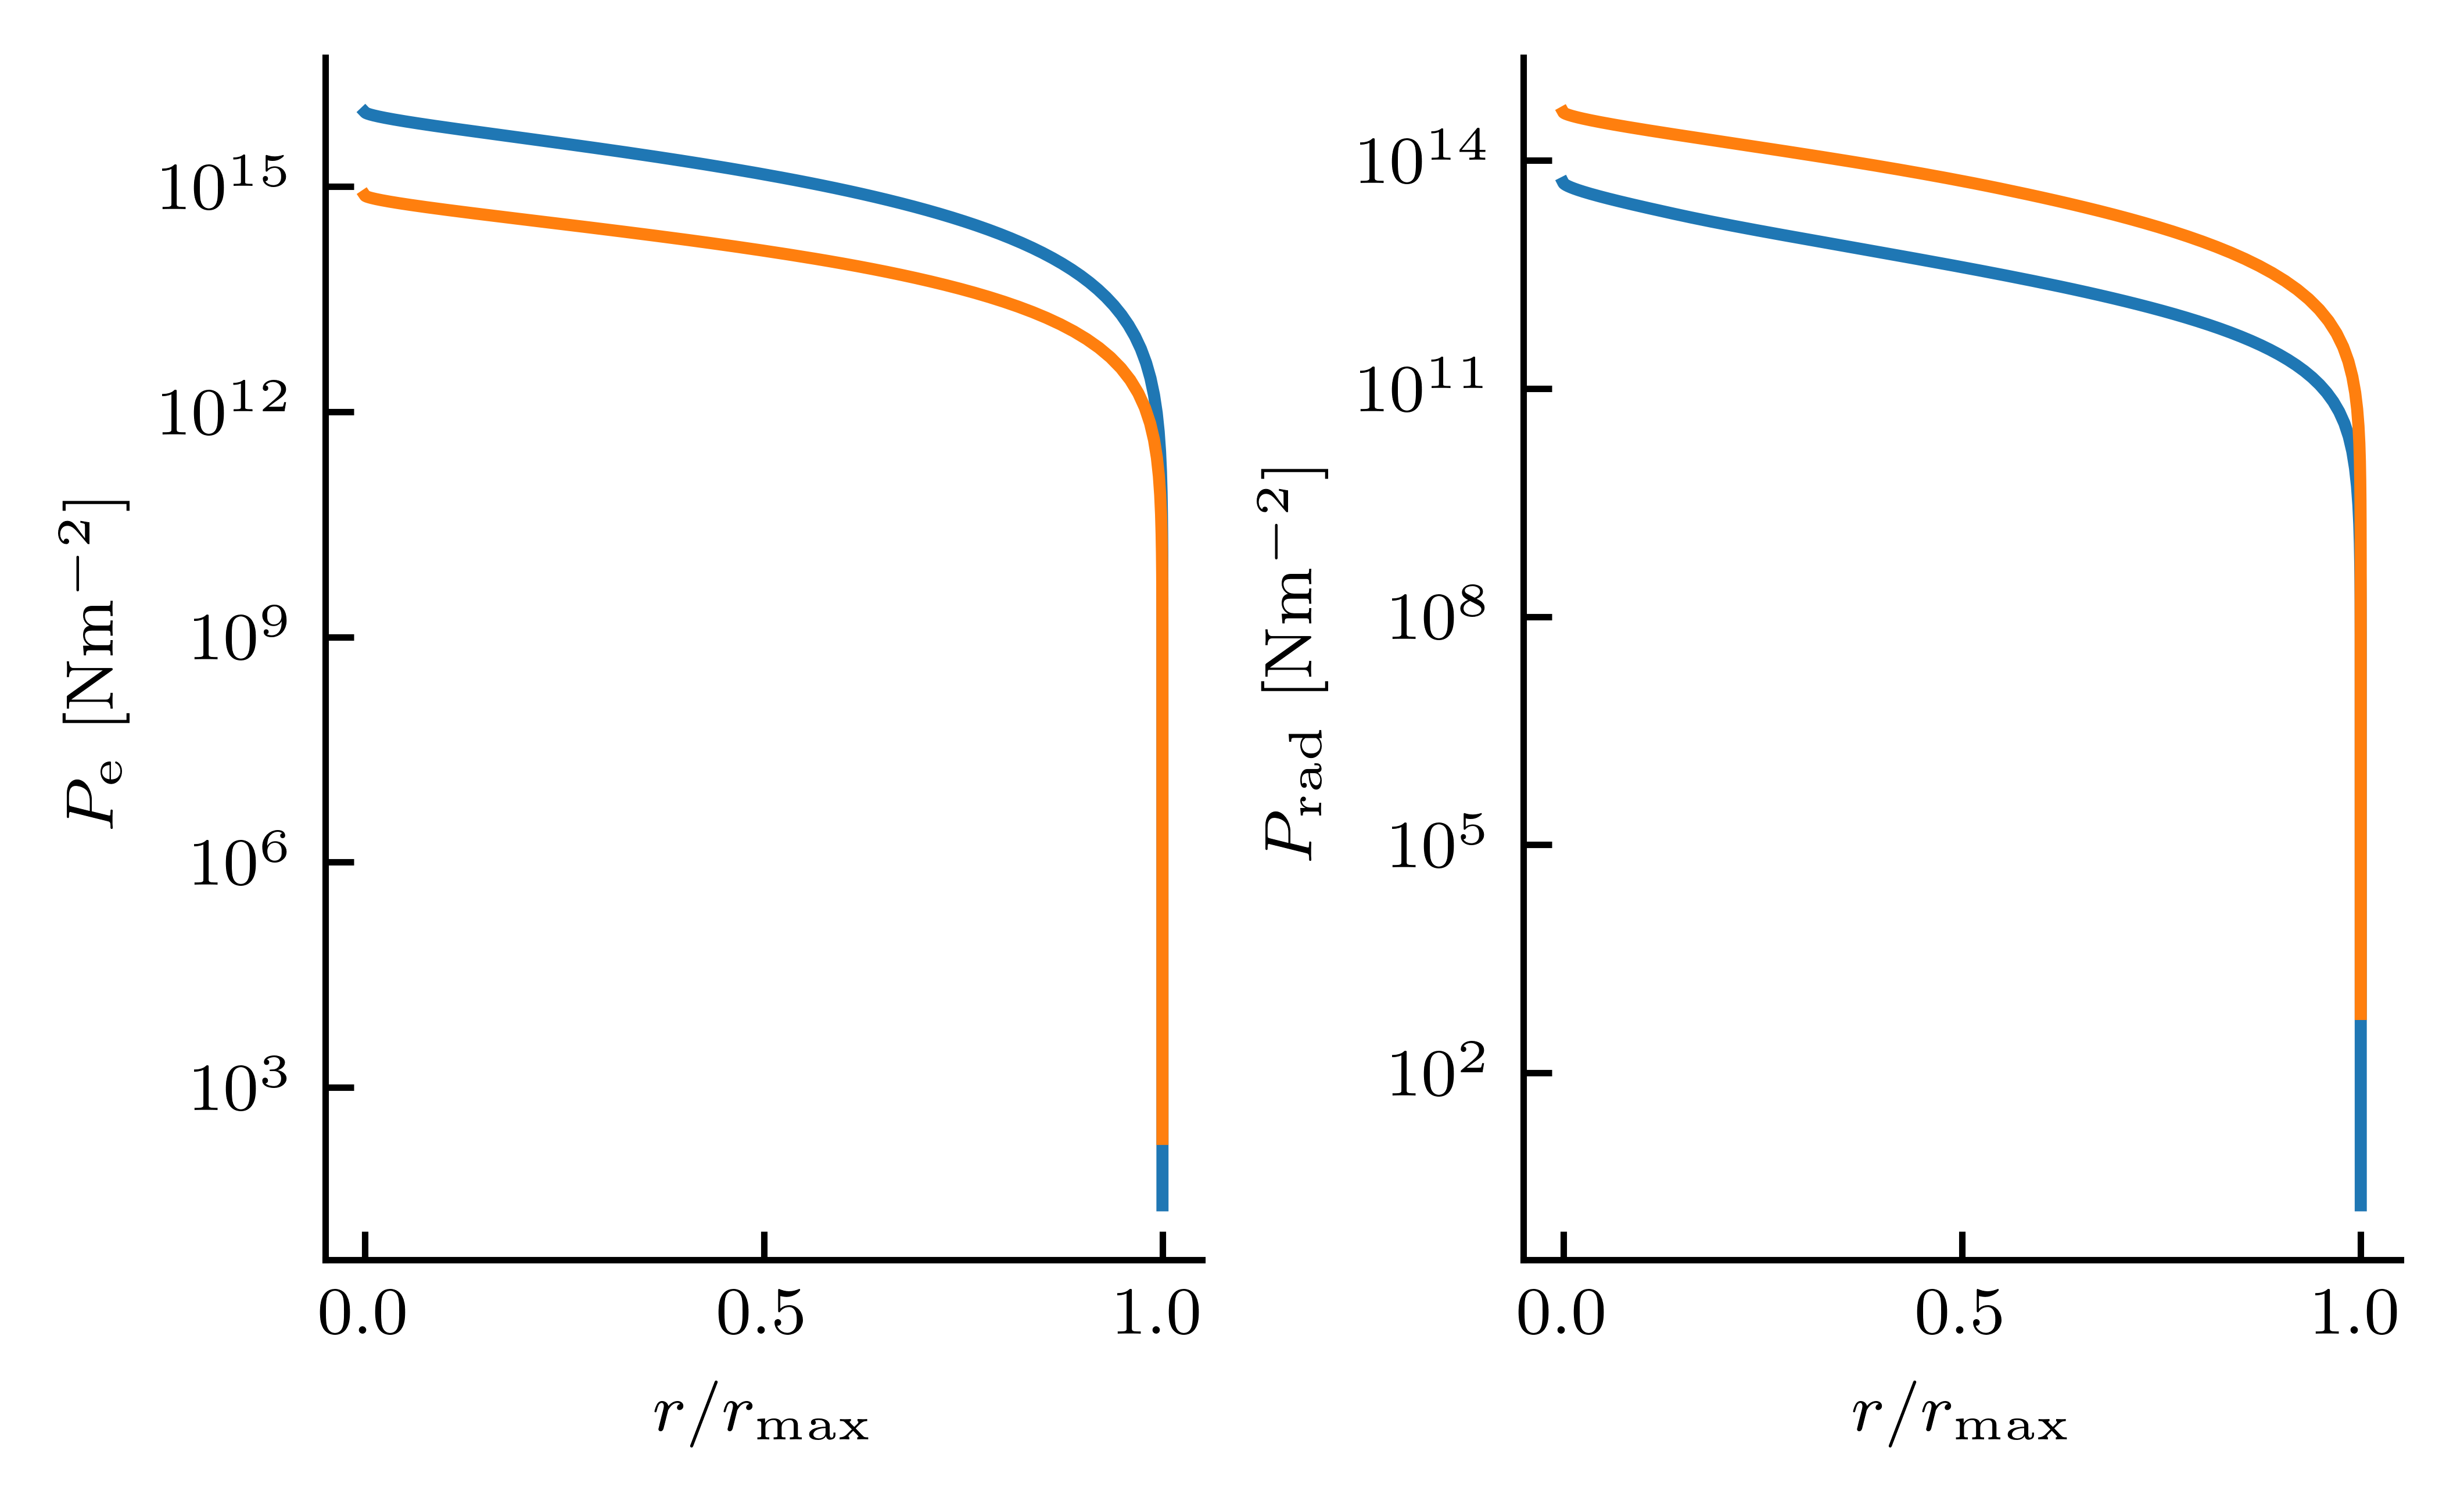

In [41]:
# Examine the differences between electron pressure and radiation
# pressure for stars of different initial mass.

def Pe_Prad(masses,step=1,r_normal=False):

    fig,axs = plt.subplots(1,2)

    for mass in masses:
        df = pd.read_csv(DATA_DIR+f'/3.2/{mass:.3g}M/structure_{step:05d}.txt',
                        delim_whitespace=True, header=None)
        df.columns = col_names_structure

        if r_normal==True:
            r = df['Mr']/max(df['Mr'])
            x_label = r'$r/r_\mathrm{max}$'
        else:
            r = df['Mr']
            x_label = r'$r/R_\odot$'

        axs[0].semilogy(r,df['Pe'])
        axs[0].set_ylabel(r'$P_\mathrm{e} \ [\mathrm{Nm^{-2}}]$')
        axs[0].set_xlabel(x_label)

        axs[1].semilogy(r,df['Pr'])
        axs[1].set_ylabel(r'$P_\mathrm{rad} \ [\mathrm{Nm^{-2}}]$')
        axs[1].set_xlabel(x_label)

        
Pe_Prad([2,30],r_normal=True)


In [45]:
# If we have enough time:
# The pressures could be visualized as circular heatmaps
# (where the circle represents the shape of the star)